<a href="https://colab.research.google.com/github/Anuraag51515/AIML2024/blob/main/AIML_Project(2203A51515).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
importimport  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
stocks_data = pd.read_csv('/content/stocks.csv')
stocks_data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [ ]:
stocks_data.Ticker.value_counts()

Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64

In [ ]:
descriptive_stats = stocks_data.groupby('Ticker')
descriptive_stats['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date',columns='Ticker',values='Close')
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['AAPL'],name='AAPL'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['GOOG'],name='GOOG'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['NFLX'],name='NFLX'))
fig.add_trace(go.Scatter(x=pivot_data.index,y=pivot_data['MSFT'],name='MSFT'))

fig.update_layout(
    title_text="Time Series of Closing Prices",
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

fig.show()

In [ ]:
volatility = pivot_data.std()
fig = px.bar(
    volatility,
    x=volatility.index,
    y=volatility.values,
    labels={
        'y':'Standard Deviation',
        'x':'Ticker'
    },
    title='Volatility of Closing Prices (Standard Deviation)'
    )
fig.show()

In [ ]:
correlation_matrix = pivot_data.corr()
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='blues',
        colorbar=dict(title='correlation'),
        text=correlation_matrix.round(2).values,
        texttemplate="%{text}"
    )
)
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title="Ticker",
    yaxis_title="Ticker",
)
fig.show()


In [ ]:
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100
fig = px.bar(
    percentage_change,
    x=percentage_change.index,
    y=percentage_change.values,
    labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
    title='Percentage Change in Closing Prices'
    )
fig.show()


In [ ]:
daily_returns = pivot_data.pct_change().dropna()
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

risk_return_df = pd.DataFrame({'Risk':risk,'Average Daily Return':avg_daily_return})

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=risk_return_df["Risk"],
        y=risk_return_df['Average Daily Return'],
        mode="markers+text",
        text=risk_return_df.index,
        textposition="top center",
        marker=dict(size=10)
    )
)
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)
fig.show()

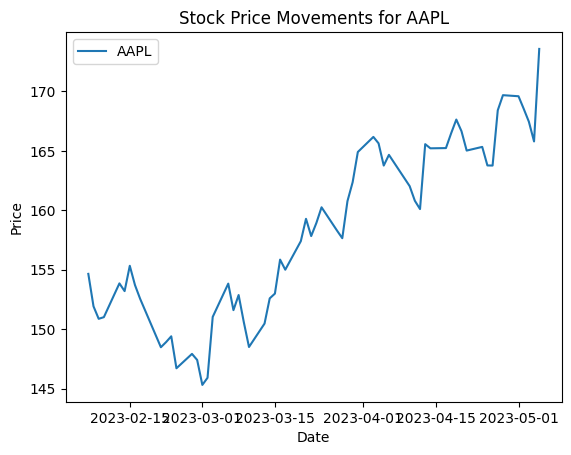

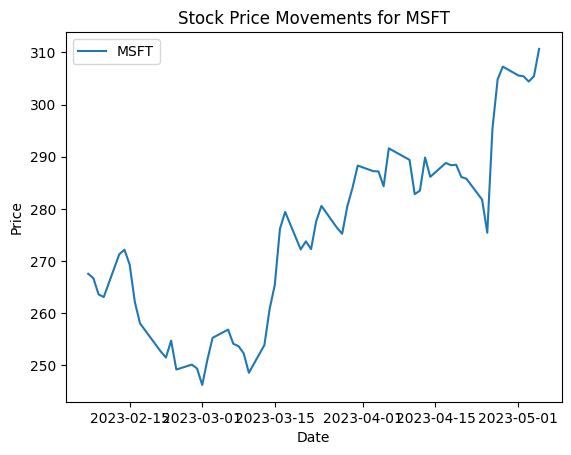

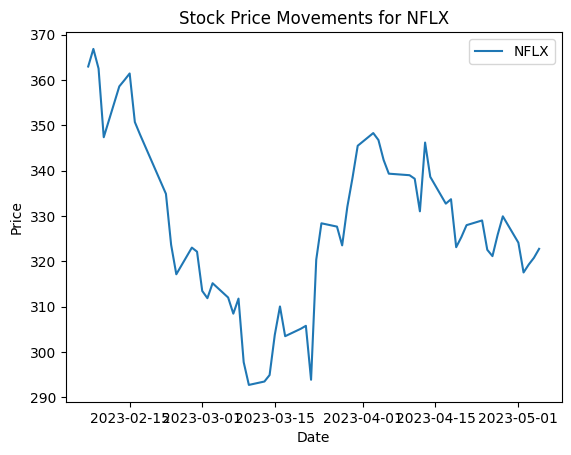

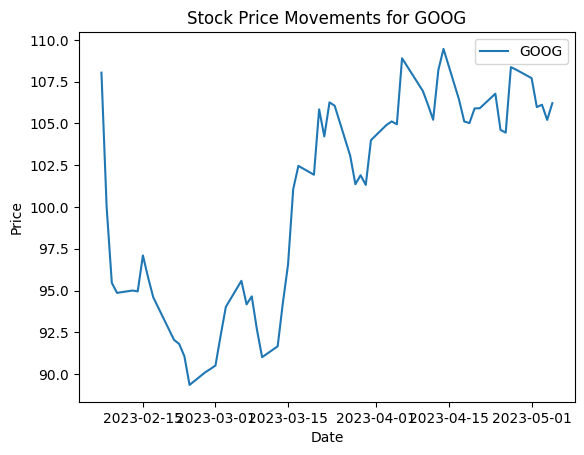

In [ ]:
import matplotlib.pyplot as plt

# Get unique ticker symbols
ticker_symbols = stocks_data['Ticker'].unique()

# Iterate over each ticker symbol
for ticker in ticker_symbols:
    # Filter DataFrame for the current ticker symbol
    stock_data = stocks_data[stocks_data['Ticker'] == ticker]

    # Plotting stock price movements
    plt.plot(stock_data['Date'], stock_data['Close'], label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Stock Price Movements for {ticker}')
    plt.legend()
    plt.show()

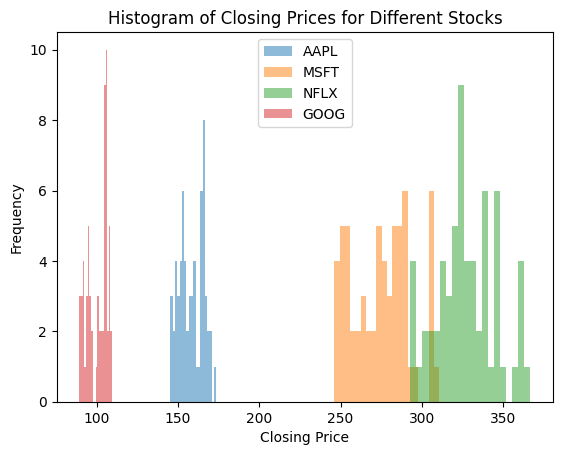

In [ ]:
import matplotlib.pyplot as plt
ticker_symbols = stocks_data['Ticker'].unique()
for ticker in ticker_symbols:
    stock_data = stocks_data[stocks_data['Ticker'] == ticker]
    plt.hist(stock_data['Close'], bins=20, alpha=0.5, label=ticker)

plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices for Different Stocks')
plt.legend()
plt.show()

In [ ]:
# random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

stock_data = pd.read_csv('/content/stocks aiml.csv')

stock_data['Price_Change'] = stock_data['Close'] - stock_data['Open']
stock_data['Price_Up'] = np.where(stock_data['Price_Change'] > 0, 1, 0)


X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = stock_data['Price_Up']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.68


In [ ]:
#decision tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

stock_data = pd.read_csv('/content/stocks aiml.csv')

stock_data['Price_Change'] = stock_data['Close'] - stock_data['Open']
stock_data['Price_Up'] = np.where(stock_data['Price_Change'] > 0, 1, 0)

X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = stock_data['Price_Up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.74


In [ ]:
#knn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

stock_data = pd.read_csv('/content/stocks aiml.csv')

stock_data['Price_Change'] = stock_data['Close'] - stock_data['Open']
stock_data['Price_Up'] = np.where(stock_data['Price_Change'] > 0, 1, 0)

X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = stock_data['Price_Up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.58


In [ ]:
#adaboost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

stock_data = pd.read_csv('/content/stocks.csv')

stock_data['Price_Change'] = stock_data['Close'] - stock_data['Open']
stock_data['Price_Up'] = np.where(stock_data['Price_Change'] > 0, 1, 0)

X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = stock_data['Price_Up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = DecisionTreeClassifier(max_depth=1)

adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=100, random_state=42)

adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.78


In [ ]:
#Gated Recurrent Units (GRU):
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

stock_data = pd.read_csv('/content/stocks.csv')

prices = stock_data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)

def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 30

X, y = create_dataset(prices_normalized, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = tf.keras.Sequential([
    tf.keras.layers.GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

predictions = model.predict(X_test)

predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
print('Root Mean Squared Error:', rmse)


Epoch 1/100
6/6 [==============================] - 8s 261ms/step - loss: 0.1112 - val_loss: 0.0171
Epoch 2/100
6/6 [==============================] - 0s 45ms/step - loss: 0.0327 - val_loss: 0.0341
Epoch 3/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0290 - val_loss: 0.0099
Epoch 4/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0213 - val_loss: 0.0150
Epoch 5/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0202 - val_loss: 0.0064
Epoch 6/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0176 - val_loss: 0.0065
Epoch 7/100
6/6 [==============================] - 0s 41ms/step - loss: 0.0147 - val_loss: 0.0039
Epoch 8/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0130 - val_loss: 0.0040
Epoch 9/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0136 - val_loss: 0.0030
Epoch 10/100
6/6 [==============================] - 0s 42ms/step - loss: 0.0182 - val_loss: 0.0031
Epoch 11/100
6/6 [